В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Исследование объявлений о продаже квартир

### Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(20) # изучаем данные в файле

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


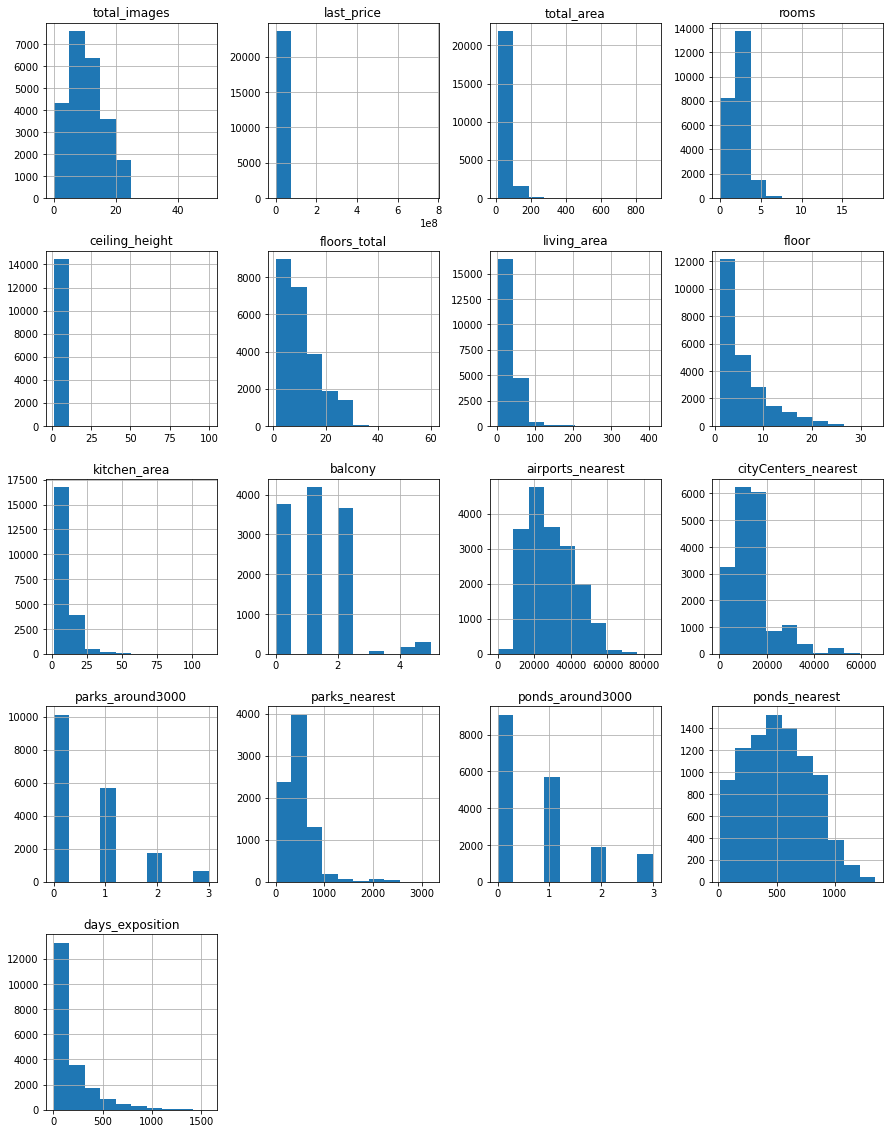

In [3]:
data.hist(figsize=(15, 20)); # гистограммы для всех числовых столбцов таблицы

Изучив данные, стало понятно, что над ними нужно поработать. В них есть пропуски, повторяющиеся названия населённых пунктов, а также ошибки в типе данных. Кроме того, некоторые значения кажутся недостоверными, например, высота потолка вызывает вопросы.

### Предобработка данных

In [4]:
data.isna().sum() #количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# По очереди будем изучать каждый столбец с пропусками, начинаем с высоты потолка
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [6]:
data['ceiling_height'].median()

2.65

В столбце «ceiling_height», возможно, отсутствуют некоторые данные из-за того, что продавец не имел их под рукой. Чтобы заменить пропущенные значения в этом столбце, мы можем использовать медиану, так как она является устойчивым показателем центра распределения данных.

In [7]:
for t in data['ceiling_height'].unique():
    data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = \
    data.loc[(data['ceiling_height'] == t), 'ceiling_height'].median()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце с размером жилой и кухонной площади, вероятно, связаны с отсутствием у продавца необходимых данных под рукой. Узнаем, какую долю от общей площади квартиры занимает кухня и жилая зона.

In [8]:
# Найдем соотношение между средней жилой / кухонной площади к средней общей площади
data['living_mean'] = (data['living_area'].mean()) / (data['total_area'].mean())
print(data['living_mean'])
# Найдем соотношение между кухонной и общей площадью
data['kitchen_mean'] = (data['kitchen_area'].mean()) / (data['total_area'].mean())
# Выберем среднее соотношение площадей, которое обычно встречается в квартирах 
ratio = data.pivot_table(index='rooms', values=['living_mean', 'kitchen_mean'], aggfunc='median').median()
ratio

0        0.57098
1        0.57098
2        0.57098
3        0.57098
4        0.57098
          ...   
23694    0.57098
23695    0.57098
23696    0.57098
23697    0.57098
23698    0.57098
Name: living_mean, Length: 23699, dtype: float64


kitchen_mean    0.175146
living_mean     0.570980
dtype: float64

In [9]:
# Заменим пропуска в жилой площади и кухонной площади 
# Следует учесть, что в квартире также имеются технические помещения, такие как санузел и коридор
# Общая площадь кухни и жилой зоны не должна превышать 90% от общей площади квартиры
data.loc[(data['living_area'].isna()) | (data['kitchen_area'].isna()) | ((data['kitchen_area'] + data['living_area']) > data['total_area'] * 0.9), ['living_area', 'kitchen_area']] =\
    pd.DataFrame({'living_area': data['total_area'] * ratio['living_mean'], 'kitchen_area': data['total_area'] * ratio['kitchen_mean']})
data.isna().sum() # проверяем

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
living_mean                 0
kitchen_mean                0
dtype: int64

Скорее всего данные в столбце «is_apartment» заполняются автоматически. Если в этом столбце отсутствуют данные, это может быть связано с тем, что кадастровый номер не был указан.

Если пользователь сам заполняет этот пункт, то данные могут не вводиться из-за незнания термина «апартаменты». В этом случае мы не можем предложить логичную замену, поэтому оставляем пропуски в этом столбце.

Вероятно, расстояние до парка, аэропорта, центра и ближайшего водоёма автоматически заполняется для определённых типов населённых пунктов. В этом случае, скорее всего, невозможно будет заполнить эти данные вручную. Если мы заполним их нулями или средними значениями, это может привести к аномалиям на графиках. Поэтому лучше оставить эти столбцы — cityCenters_nearest, airports_nearest, ponds_nearest и parks_nearest — незаполненными.

С другой стороны, в столбцах, где указано количество парков, водоёмов и балконов, логично заменить пропуски на нули. Если продавец не указал параметры, которые могут увеличить стоимость объекта недвижимости, то, вероятно, такого преимущества нет. И в случае автоматического заполнения данных пунктов замена также оправдана.

In [10]:
data['balcony'] = data['balcony'].fillna(value='0')

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(value='0')

In [12]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value='0')

Количество этажей в доме могло быть не указано продавцами из-за неуверенности в данных, а название населенного пункта — для увеличения просмотров объявления. Ведь если указать точку в центре города, то просмотров будет больше. Удаляем строки с пропусками в столбцах «floors_total» и «locality_name», так как потеря данных незначительна, и нет возможности заполнить их без дополнительного запроса информации.

In [13]:
data = data.dropna(subset=['floors_total', 'locality_name'])
data.isna().sum() # проверяем

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
living_mean                 0
kitchen_mean                0
dtype: int64

Столбец "days_exposition" сообщает нам, сколько дней длилось объявление о продаже недвижимости. Если объявление было закрыто (недвижимость продана), то в этом поле будет указано количество дней. Если же объявление ещё открыто (недвижимость не продана), то в поле будет NaN (не число).

Заполнение этого поля каким-либо значением может исказить данные и привести к аномалиям. Поэтому лучше оставить это поле пустым.

Найдём столбцы, где необходимо изменить тип данных, и ещё раз обратимся к информации о данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  object 
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

В столбцах «ponds_around3000», «parks_around3000», «balcony», «is_apartment», «floors_total», «first_day_exposition» и «last_price» необходимо изменить тип данных.

В столбцах «ponds_around3000» и «parks_around3000» должно быть указано конкретное число объектов, расположенных в радиусе 3000 метров от места размещения объявления.

In [15]:
data['ponds_around3000'] = data.loc[:,'ponds_around3000'].astype(int)

In [16]:
data['parks_around3000'] = data.loc[:,'parks_around3000'].astype(int)

Количество балконов не может быть дробным числом. Этот столбец также будет изменён.

In [17]:
data['balcony'] = data.loc[:,'balcony'].astype(int)

Количество этажей — это всегда целое число. В этот пункт также будут внесены изменения.

In [18]:
data['floors_total'] = data.loc[:,'floors_total'].astype(int)

Столбец «is_apartment» содержит логические значения, поэтому тип данных «object» здесь не подходит. Мы это исправим.

In [19]:
data['is_apartment'] = data.loc[:,'is_apartment'].astype(bool)

Первый день размещения — это определённая дата. Для дальнейшей работы с данными в этом столбце также будет изменён тип данных.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [21]:
data['last_price'] = data.loc[:,'last_price'].astype(int)

In [22]:
data.info() # проверяем, были ли корректно изменены типы данных в выбранных столбцах.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Приступим к удалению неявных дубликатов в столбце с названиями населённых пунктов. Для начала мы рассмотрим уникальные значения в этом столбце.

In [23]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сначала заменим все буквы «ё» на «е» в столбце с названиями населённых пунктов. Затем разделим столбец на две части: в одной части будет тип населённого пункта, а в другой — его название.

Обратив внимание на названия населённых пунктов, мы заметим, что они имеют общий шаблон: тип населённого пункта начинается с маленькой буквы, а само название — с заглавной. Используя регулярные выражения, мы можем разделить тип и название по этому шаблону. Результаты мы запишем в два новых столбца: один с названиями населённых пунктов, другой — с их типами. 

In [24]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [25]:
data[['locality_type', 'locality_name_split']] = data['locality_name'].str.split(pat='(?=[A-Я])', n=1, expand=True)
len(data['locality_name_split'].unique()) # проверяем результат

305

Обработаем необычные и выбивающиеся из общего ряда значения, так называемые аномалии. В первую очередь, мы обращаем внимание на высоту потолков.

Анализ гистограммы показал, что есть аномально большие и маленькие значения высоты потолков. Скорее всего, это ошибка продавца, который мог ошибиться при указании значения или неправильно поставить разделитель. Мы проверим и исправим эти данные.

In [26]:
for ceiling in data['ceiling_height']:
    if ceiling > 20:
        data.loc[data['ceiling_height'] == ceiling, 'ceiling_height'] = data.loc[(data['ceiling_height'] == ceiling), 'ceiling_height']/10

In [27]:
data[data['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_mean,kitchen_mean,locality_type,locality_name_split


In [28]:
data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_mean,kitchen_mean,locality_type,locality_name_split
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,True,False,False,5.20,0,городской поселок Мга,NaN,NaN,0,NaN,0,NaN,248.0,0.57098,0.175146,городской поселок,Мга
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,True,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0,0.57098,0.175146,,Санкт-Петербург
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,True,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0,0.57098,0.175146,,Санкт-Петербург


Поскольку низкий потолок встречается нечасто, а потеря данных незначительна, и нет возможности устранить эту ошибку логичным способом, мы удалим эти строки.

In [29]:
data = data[data['ceiling_height'] > 2]

In [30]:
data['ceiling_height'].describe()

count    23551.000000
mean         2.719299
std          0.274287
min          2.200000
25%          2.600000
50%          2.700000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

Рассмотрим данные о площади квартир.

In [31]:
data['total_area'].describe() 

count    23551.000000
mean        60.331121
std         35.664202
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [32]:
data[data['total_area'] > 150]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_mean,kitchen_mean,locality_type,locality_name_split
3,0,64900000,159.0,2015-07-24,3,2.70,14,90.785766,9,True,False,False,27.848168,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,0.57098,0.175146,,Санкт-Петербург
42,13,22000000,161.8,2015-07-08,4,2.80,4,80.900000,2,False,False,False,17.600000,5,Петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0,0.57098,0.175146,,Петергоф
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.000000,4,True,False,False,50.000000,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,541.0,0.57098,0.175146,,Санкт-Петербург
121,20,33000000,180.0,2017-02-17,3,2.90,9,86.000000,8,False,False,False,24.000000,4,Санкт-Петербург,25689.0,4264.0,1,633.0,0,NaN,144.0,0.57098,0.175146,,Санкт-Петербург
147,10,27700000,179.6,2017-07-06,5,2.85,25,97.200000,25,True,False,False,33.800000,2,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,75.0,0.57098,0.175146,,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23400,17,30000000,213.0,2017-09-28,7,3.40,5,151.400000,5,True,False,False,30.800000,0,Санкт-Петербург,21146.0,1225.0,2,342.0,3,30.0,299.0,0.57098,0.175146,,Санкт-Петербург
23448,3,14700000,180.0,2018-02-08,6,3.00,6,126.000000,5,True,False,False,20.000000,0,Санкт-Петербург,23955.0,5089.0,0,NaN,2,616.0,NaN,0.57098,0.175146,,Санкт-Петербург
23491,20,21800000,250.0,2017-09-16,3,2.70,12,104.000000,7,True,False,False,45.000000,0,Санкт-Петербург,43558.0,13138.0,0,NaN,0,NaN,49.0,0.57098,0.175146,,Санкт-Петербург
23549,5,19600000,184.0,2016-04-21,3,3.00,19,55.700000,19,False,False,False,24.500000,5,Санкт-Петербург,18995.0,4837.0,0,NaN,0,NaN,205.0,0.57098,0.175146,,Санкт-Петербург


Некоторые данные сильно выделяются на общем фоне. Это означает, что площадь некоторых квартир значительно отличается от остальных. Такие квартиры не являются стандартными, и они не подходят для анализа типичной недвижимости.

Если мы будем учитывать квартиры с большой площадью при анализе типичной недвижимости, это может исказить наши выводы. Поэтому будет правильно исключить эти незначительные данные о недвижимости (менее 2.5 %) из рассмотрения.

In [33]:
data = data[data['total_area'] < 150]
data['total_area'].describe() 

count    22972.000000
mean        56.456470
std         22.793806
min         12.000000
25%         40.000000
50%         51.000000
75%         67.600000
max        149.600000
Name: total_area, dtype: float64

При предобработке данных:
* были обнаружены пропуски, и там, где это было возможно, значения были заполнены;
* были рассмотрены типы данных в каждом столбце, и выявлены столбцы, в которых тип данных требовалось изменить;
* были устранены неявные дубликаты в столбце с названиями населённых пунктов, для чего был создан новый столбец «locality_name_split»;
* были обработаны редкие и необычные значения (аномалии).

### Добавление в таблицу новых столбцов

Добавим в таблицу столбцы. Начнем с параметра "цена одного квадратного метра".

In [34]:
data['price_meter'] = round(data['last_price'] / data['total_area'], 2)
data['price_meter'].head()

0    120370.37
1     82920.79
2     92785.71
4    100000.00
5     95065.79
Name: price_meter, dtype: float64

Определим день недели, когда было опубликовано объявление о продаже квартиры, с помощью функции dt.weekday. Создадим столбец «weekday», в котором понедельник будет иметь номер 0, а воскресенье — номер 6. 

In [35]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head(10) # проверим

0     3
1     1
2     3
4     1
5     0
6     3
7     3
8     2
9     6
10    3
Name: weekday, dtype: int64

Определим месяц, когда было опубликовано объявление о продаже квартиры.

In [36]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition'].head(10)

0      3
1     12
2      8
4      6
5      9
6     11
7      4
8      5
9      2
10    11
Name: month_exposition, dtype: int64

Определим год, когда было опубликовано объявление о продаже квартиры.

In [37]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition'].head(10)

0     2019
1     2018
2     2015
4     2018
5     2018
6     2017
7     2019
8     2018
9     2017
10    2017
Name: year_exposition, dtype: int64

Создадим столбец, в котором укажем тип этажа квартиры. Значения: «первый», «последний», «другой».

In [38]:
def floor_type(floor):
    if floor ['floor'] ==1:
        return 'первый'
    if floor ['floor'] == floor['floors_total']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)
data['floor_type'].head()

0    другой
1    первый
2    другой
4    другой
5    другой
Name: floor_type, dtype: object

Рассчитаем расстояние до центра города в километрах и создадим столбец «РcityCenters_km».

In [39]:
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000)
data['cityCenters_km'].head()

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: cityCenters_km, dtype: float64

В третьем пункте были созданы столбцы со следующими данными:
* цена одного квадратного метра;
* день недели, месяц и год размещения объявления о продаже недвижимости;
* тип этажа квартиры;
* расстояние до центра города в километрах.

### Исследовательский анализ данных

In [40]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_mean,kitchen_mean,locality_type,locality_name_split,price_meter,weekday,month_exposition,year_exposition,floor_type,cityCenters_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,True,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.57098,0.175146,,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.70,11,18.600000,1,True,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.57098,0.175146,поселок,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.300000,4,True,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.57098,0.175146,,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,True,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.57098,0.175146,,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.70,12,14.400000,5,True,False,False,9.100000,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,0.57098,0.175146,городской поселок,Янино-1,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.70,26,10.600000,6,True,False,False,14.400000,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,0.57098,0.175146,поселок,Парголово,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.70,24,40.882144,22,True,False,False,12.540433,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,0.57098,0.175146,,Санкт-Петербург,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.430000,26,True,False,False,8.810000,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,0.57098,0.175146,поселок,Мурино,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,True,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,0.57098,0.175146,,Санкт-Петербург,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.300000,3,True,False,False,8.500000,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,0.57098,0.175146,,Санкт-Петербург,127525.25,3,11,2017,другой,14.0


Изучим параметры объектов недвижимости и построим отдельные гистограммы для каждого из этих параметров. Начнем с данных о площади квартир. Мы уже проанализировали и обработали необычные значения выше. Теперь создадим гистограмму.

count    22972.000000
mean        56.456470
std         22.793806
min         12.000000
25%         40.000000
50%         51.000000
75%         67.600000
max        149.600000
Name: total_area, dtype: float64

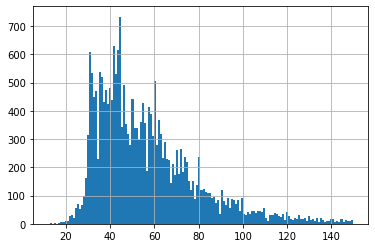

In [41]:
data['total_area'].hist(bins=150)
data['total_area'].describe()

Большинство объектов недвижимости имеют площадь от 40 до 67 квадратных метров.

Теперь более детально рассмотрим жилую площадь объектов. Получим описательные данные и построим и построим гистограмму.

count    22972.000000
mean        32.054076
std         14.969721
min          2.000000
25%         18.780243
50%         30.000000
75%         41.000000
max        117.100000
Name: living_area, dtype: float64

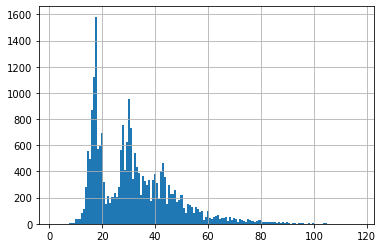

In [42]:
data['living_area'].hist(bins=150)
data['living_area'].describe()

Большинство объектов недвижимости имеют жилую площадь от 19 до 41 квадратного метра.

Рассмотрим теперь площадь кухни. Как и в случае с жилой площадью, мы изучим данные и отобразим их в виде гистограммы.

count    22972.00000
mean         9.98151
std          4.64225
min          1.30000
25%          7.00000
50%          9.00000
75%         11.50000
max         72.00000
Name: kitchen_area, dtype: float64

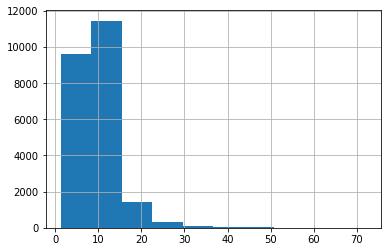

In [43]:
data['kitchen_area'].hist(bins=10)
data['kitchen_area'].describe()

In [44]:
data[data['kitchen_area'] > 30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_mean,kitchen_mean,locality_type,locality_name_split,price_meter,weekday,month_exposition,year_exposition,floor_type,cityCenters_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.57098,0.175146,,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
239,16,22000000,119.0,2017-02-16,3,3.50,5,56.00,3,False,False,False,35.0,0,Санкт-Петербург,21698.0,2004.0,1,688.0,1,86.0,77.0,0.57098,0.175146,,Санкт-Петербург,184873.95,3,2,2017,другой,2.0
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.80,7,True,False,False,49.2,4,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,NaN,0.57098,0.175146,,Санкт-Петербург,283783.78,5,11,2016,другой,7.0
379,14,21000000,96.0,2017-02-07,2,3.00,7,20.00,1,True,False,False,36.0,2,Санкт-Петербург,23843.0,2391.0,0,NaN,3,418.0,153.0,0.57098,0.175146,,Санкт-Петербург,218750.00,1,2,2017,первый,2.0
576,12,8600000,100.0,2017-09-11,3,2.70,5,42.50,2,True,False,False,31.0,1,Санкт-Петербург,13836.0,8839.0,0,NaN,0,NaN,50.0,0.57098,0.175146,,Санкт-Петербург,86000.00,0,9,2017,другой,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22128,17,23000000,125.0,2017-11-23,3,3.30,5,49.00,5,True,False,False,34.0,0,Санкт-Петербург,24054.0,4621.0,1,327.0,0,NaN,123.0,0.57098,0.175146,,Санкт-Петербург,184000.00,3,11,2017,последний,5.0
22225,18,16080000,147.0,2018-03-07,4,2.50,7,69.28,5,True,False,False,33.0,0,Санкт-Петербург,28768.0,7615.0,1,602.0,0,NaN,NaN,0.57098,0.175146,,Санкт-Петербург,109387.76,2,3,2018,другой,8.0
22807,20,23000000,149.1,2018-02-09,4,2.70,6,68.00,4,True,False,False,35.0,0,Санкт-Петербург,31687.0,4996.0,2,192.0,2,804.0,306.0,0.57098,0.175146,,Санкт-Петербург,154258.89,4,2,2018,другой,5.0
22948,10,34500000,100.0,2018-06-26,3,2.70,7,34.20,3,True,False,False,34.4,0,Санкт-Петербург,25754.0,5961.0,3,125.0,0,NaN,NaN,0.57098,0.175146,,Санкт-Петербург,345000.00,1,6,2018,другой,6.0


Количество квартир с кухней площадью более 30 квадратных метров невелико. Эти данные точны и не оказывают существенного влияния на общую картину, поэтому мы не будем их менять.

Давайте рассмотрим, сколько комнат в объектах недвижимости.

[3 1 2 4 5 6 0 7]


<AxesSubplot:>

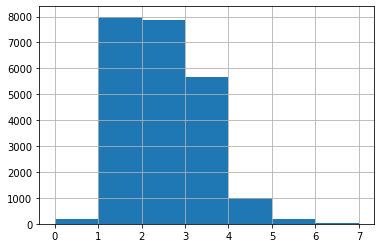

In [45]:
print(data['rooms'].unique())
data['rooms'].hist(bins=7)

Чаще всего на продажу выставлялись одно-, двух- и трёхкомнатные квартиры. Эти данные выглядят достоверно, изменения не требуются.

Выясним, на каких этажах квартиры расположены чаще: на первом, последнем или каких-то других?

<AxesSubplot:>

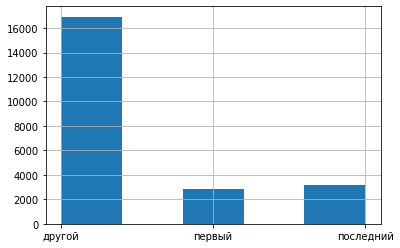

In [46]:
data['floor_type'].hist(bins=5)

Квартиры на первом и последнем этажах реже выставлялись на продажу, чем квартиры на других этажах. Это связано с тем, что в категории «другой» было больше вариантов этажей. Эти данные выглядят достоверно, поэтому изменения не требуются.

Рассмотрим объявления в зависимости от дня недели.

<AxesSubplot:>

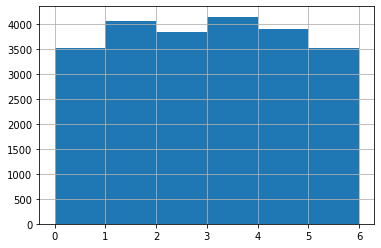

In [47]:
data['weekday'].hist(bins=6)

Обратим внимание на интересную закономерность: чаще всего недвижимость выставляли на продажу со вторника по субботу. Особенно выделяется четверг. Реже всего объявления публиковали в понедельник и воскресенье.

[16 11  5 14 12 26 24 27  9  6 17 25  3 23 19 18  4 22  2 10  7 13 15  8
 20 28 36 21 35 34 60  1 29 33 52]
count    22972.000000
mean        10.745734
std          6.615617
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

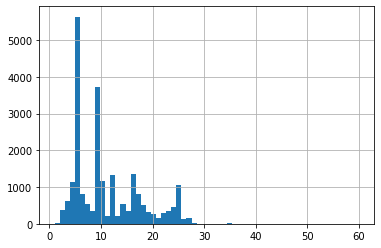

In [48]:
print(data['floors_total'].unique())
print(data['floors_total'].describe())
data['floors_total'].hist(bins=60)

In [49]:
len(data.query('floors_total > 30')) / len(data) # посмотрим их процент в данных и сделаем выводы

0.0013494689186836148

Поскольку квартиры с количеством этажей более 30 встречаются редко и являются нетипичными, а объём потерянных данных незначителен (менее 1 процента), мы исключим эти строки из таблицы. 

count    22941.000000
mean        10.711129
std          6.549838
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

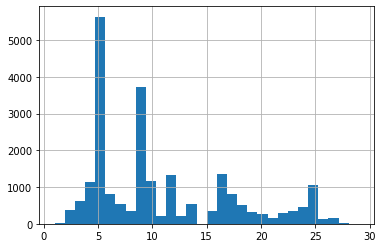

In [50]:
data = data[data['floors_total'] <= 30]
print(data['floors_total'].describe())
data['floors_total'].hist(bins=30)

Чаще всего объявления о продаже недвижимости размещались в домах с 5 и 9 этажами.

Узнаем, на каком расстоянии от центра города обычно предлагаются квартиры для продажи.

count    17467.000000
mean     14398.677163
std       8568.508373
min        208.000000
25%       9660.000000
50%      13223.000000
75%      16371.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

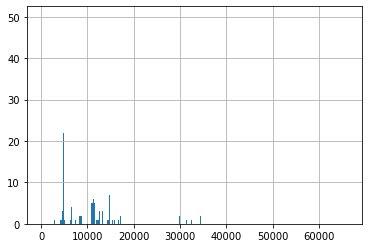

In [51]:
print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'].hist(bins=65968)

In [52]:
len(data.query('cityCenters_nearest > 20000')) / len(data) # посмотрим их процент в данных и сделаем выводы

0.11106752103221307

В нашем исследовании мы обнаружили множество квартир, расположенных далеко от центра города. Также было много объявлений с пропущенными данными в этом критерии. Эти данные выглядят логичными и равномерными, поэтому мы оставим их без изменений. Чтобы лучше понять распределение значений, мы построим гистограмму, которая покажет наиболее часто встречающиеся значения.

<AxesSubplot:>

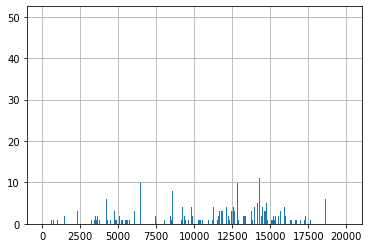

In [53]:
# data.plot(x='cityCenters_nearest', y='last_price', kind='scatter') пробный график оказался не наглядным, оставим на заметку
data['cityCenters_nearest'].hist(bins=20000, range=(0, 20000))

Недвижимость выставленная на продажу обычно находится на расстоянии от центра города от 9,66 до 16,37 километра.

Узнаем, на каком расстоянии от ближайшего парка обычно расположены объекты недвижимости.

count    7646.000000
mean      493.254512
std       342.517750
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

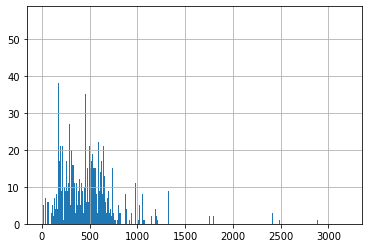

In [54]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=3190)

In [55]:
data[data['parks_nearest'] > 1500] # изучим строки с большим растоянием до парка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_mean,kitchen_mean,locality_type,locality_name_split,price_meter,weekday,month_exposition,year_exposition,floor_type,cityCenters_km
323,6,9591727,72.0,2017-06-29,2,2.80,10,34.000000,9,True,False,False,17.000000,0,Санкт-Петербург,23756.0,5384.0,1,2295.0,1,534.0,118.0,0.57098,0.175146,,Санкт-Петербург,133218.43,3,6,2017,другой,5.0
371,11,7300000,65.0,2018-09-12,2,2.70,12,30.040000,2,True,False,False,10.200000,5,Санкт-Петербург,18621.0,17623.0,1,1510.0,2,372.0,92.0,0.57098,0.175146,,Санкт-Петербург,112307.69,2,9,2018,другой,18.0
438,6,7410000,70.0,2017-06-29,2,2.70,12,39.968576,5,True,False,False,12.260200,0,Санкт-Петербург,23756.0,5384.0,1,2295.0,1,534.0,229.0,0.57098,0.175146,,Санкт-Петербург,105857.14,3,6,2017,другой,5.0
512,8,6260000,43.3,2014-12-09,1,2.70,8,24.723419,5,True,False,False,7.583809,0,Санкт-Петербург,39946.0,10720.0,1,2102.0,3,303.0,1155.0,0.57098,0.175146,,Санкт-Петербург,144572.75,1,12,2014,другой,11.0
680,14,7200000,43.0,2017-10-31,1,2.70,8,9.000000,2,True,False,False,23.000000,0,Санкт-Петербург,23900.0,5232.0,1,2137.0,1,933.0,296.0,0.57098,0.175146,,Санкт-Петербург,167441.86,1,10,2017,другой,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23159,2,7952000,64.0,2018-07-05,2,2.75,10,37.000000,3,True,False,False,11.000000,1,Санкт-Петербург,23756.0,5384.0,1,2295.0,1,534.0,54.0,0.57098,0.175146,,Санкт-Петербург,124250.00,3,7,2018,другой,5.0
23240,20,21800000,114.0,2019-04-22,3,2.75,15,64.400000,7,True,False,False,23.300000,0,Санкт-Петербург,37106.0,8256.0,1,2009.0,3,253.0,NaN,0.57098,0.175146,,Санкт-Петербург,191228.07,0,4,2019,другой,8.0
23343,12,11900000,85.0,2017-04-10,3,2.70,8,51.000000,7,True,False,False,13.600000,0,Санкт-Петербург,18140.0,17143.0,1,1514.0,2,16.0,475.0,0.57098,0.175146,,Санкт-Петербург,140000.00,0,4,2017,другой,17.0
23404,3,17671500,90.0,2017-02-03,2,2.80,12,35.000000,9,False,False,False,16.000000,1,Санкт-Петербург,39946.0,10720.0,1,2102.0,3,303.0,277.0,0.57098,0.175146,,Санкт-Петербург,196350.00,4,2,2017,другой,11.0


In [56]:
len(data.query('parks_nearest > 1500')) / len(data) # посмотрим их процент в данных и сделаем выводы

0.0071923630181770625

Данные выглядят вполне логично и не вызывают подозрений. 

Обычно парки и скверы расположены в пределах 300–600 метров от объекта недвижимости.

Поскольку в этом столбце много пропусков, которые нельзя заполнить на основе логики, имеющиеся данные лучше оставить без изменений. Чтобы получить более полное представление о распределении значений, мы создадим гистограмму, которая наглядно покажет наиболее часто встречающиеся значения.

<AxesSubplot:>

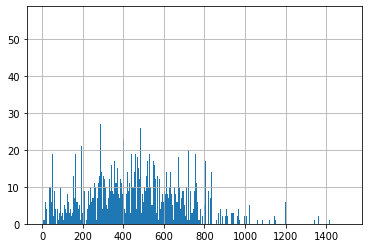

In [57]:
data['parks_nearest'].hist(bins=1500, range=(0, 1500))

Посмотрим, как быстро продавались квартиры. Для этого мы проанализируем, сколько дней было размещено каждое объявление. Затем мы построим гистограмму и определим характерные значения для столбца «days_exposition», чтобы сделать выводы.

count    19928.000000
mean       178.055901
std        217.128033
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

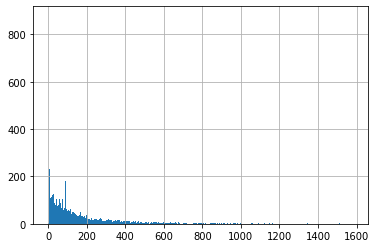

In [58]:
data['days_exposition'].hist(bins=1580)
data['days_exposition'].describe()

Если проанализировать данные о количестве дней, в течение которых объявления о продаже недвижимости были размещены, то можно сделать вывод, что обычно такие объекты продаются в срок от 44 до 226 дней, то есть примерно от полутора до семи с половиной месяцев. В среднем продажа занимает почти шесть месяцев, а медианное значение составляет 94 дня, что примерно равно трём месяцам.

Объявления о продаже недвижимости размещались на срок от одного дня до 1580 дней, то есть более четырёх лет. Быстрыми продажами можно считать сделки, которые были совершены в течение 1–44 дней, а долгими — те, что длились более 226 дней, то есть дольше семи с половиной месяцев.

Определим факторы, которые в наибольшей степени влияют на общую стоимость недвижимости. Сначала мы выясним, зависит ли цена от площади квартиры.

0.6959547301490229

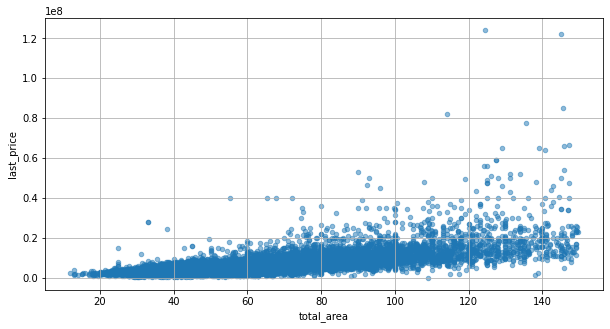

In [59]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.5, figsize=(10, 5))
data['total_area'].corr(data['last_price'])

Из графика следует, что чем больше площадь квартиры, тем выше её стоимость. Наиболее дорогие квартиры имеют площадь свыше 120 квадратных метров.

Коэффициент корреляции Пирсона для этого графика составляет 0,695 и является высоким и положительным, что свидетельствует о тесной линейной связи между площадью квартиры и её стоимостью.

Рассмотрим, как цена зависит от жилой площади квартиры.

0.5824361268770778

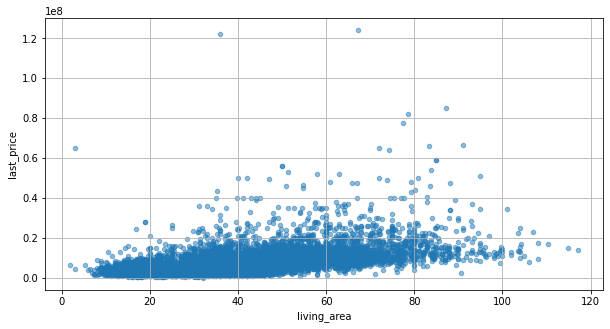

In [60]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.5, figsize=(10, 5))
data['living_area'].corr(data['last_price'])

График показывает, что чем больше жилая площадь квартиры, тем выше её цена. Корреляция между этими показателями составляет 0,58, что указывает на наличие связи, но не очень сильной. Это означает, что увеличение жилой площади обычно приводит к увеличению стоимости, но не всегда.

Теперь разберём, как цена зависит от площади кухни в квартире.

0.5636936672455447

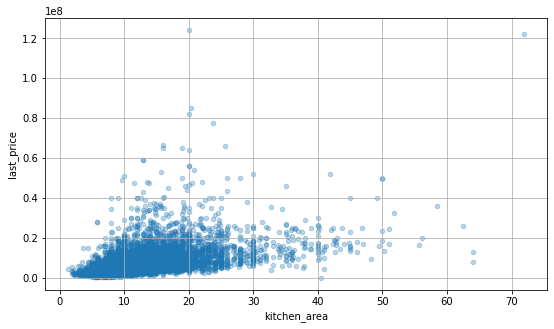

In [61]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.3, figsize=(9, 5))
data['kitchen_area'].corr(data['last_price'])

Как и в предыдущем анализе данных, график демонстрирует, что цена квартиры возрастает с увеличением площади её кухни. Коэффициент корреляции между этими показателями составляет 0,52, что указывает на наличие взаимосвязи, хотя и не очень сильной. Это означает, что, как правило, при увеличении площади кухни растёт и её стоимость, однако это не всегда так.

Теперь рассмотрим, как цена зависит от количества комнат в недвижимости. Для этого мы сгруппируем данные по количеству комнат и построим столбчатую диаграмму.

0.39909150276905586

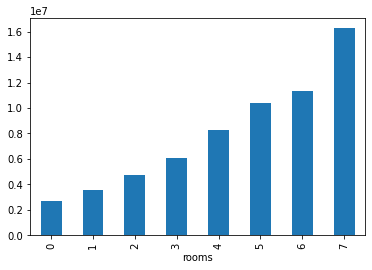

In [62]:
data.groupby('rooms')['last_price'].median().plot(kind='bar')
data['rooms'].corr(data['last_price'])

График показывает, что цена квартиры увеличивается с увеличением количества комнат в ней. Коэффициент корреляции между этими показателями составляет 0,4, что указывает на наличие взаимосвязи, хотя и не очень сильной. Это означает, что обычно чем больше комнат в квартире, тем выше её стоимость. Однако стоит отметить, что эта зависимость не всегда соблюдается.

Теперь рассмотрим, как цена зависит от этажа расположения квартиры: первый этаж, последний этаж или другие этажи. Для этого мы сгруппируем данные по этим критериям и построим столбчатую диаграмму, чтобы наглядно продемонстрировать различия в ценах на квартиры в зависимости от этажа.

<AxesSubplot:xlabel='floor_type'>

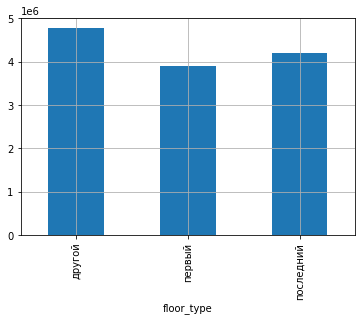

In [63]:
data.groupby('floor_type')['last_price'].median().plot(kind='bar', grid=True)

Из графика видно, что квартиры на первом этаже обычно стоят дешевле, чем квартиры на других этажах. Квартиры на последних этажах стоят дороже, чем на первых, но дешевле, чем на остальных.

Таким образом, можно сделать вывод, что стоимость недвижимости зависит от этажа, на котором она находится.

Выясним, существует ли зависимость между ценой квартиры и днём недели, месяцем или годом, когда она была выставлена на продажу.

-0.012800107186439072

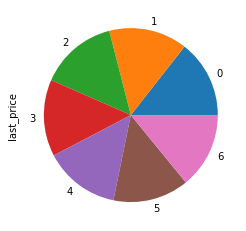

In [64]:
data.groupby('weekday')['last_price'].median().plot(kind='pie')
data['weekday'].corr(data['last_price'])

Из графика видно, что цена на недвижимость не зависит от того, в какой день было размещено объявление.

<AxesSubplot:xlabel='month_exposition'>

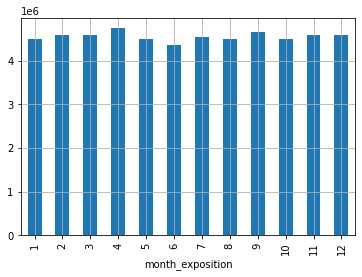

In [65]:
data.groupby('month_exposition')['last_price'].median().plot(kind='bar', grid=True)

График показывает, что существует связь между месяцем размещения объявления о продаже недвижимости и ценой, по которой объект был реализован. Так, в июне квартиры продавались по самым низким ценам, а в апреле — по самым высоким.

<AxesSubplot:xlabel='year_exposition'>

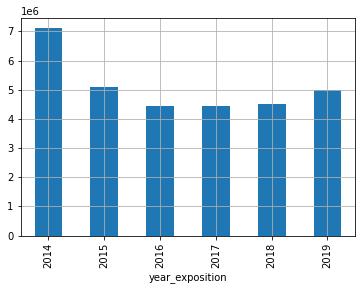

In [66]:
data.groupby('year_exposition')['last_price'].median().plot(kind='bar', grid=True)

Из графика можно сделать интересные выводы. Оказывается, в 2014 году объекты недвижимости продавались по самым высоким ценам. Наибольшее снижение стоимости было зафиксировано в 2016 и 2017 годах. После этого цены на недвижимость начали постепенно расти.

Итак, можно сделать вывод, что наиболее значимыми факторами, влияющими на общую стоимость объекта недвижимости, являются площадь квартиры, жилая площадь, площадь кухни и количество комнат. В меньшей степени на цену влияют этаж расположения квартиры и месяц, в котором было опубликовано объявление о продаже. Не удалось обнаружить взаимосвязи между днём недели, в который было опубликовано объявление о продаже квартиры, и её стоимостью. График цен на квартиры по годам показывает, что после периода снижения цен начался постепенный рост стоимости объектов недвижимости.

Рассчитаем среднюю стоимость одного квадратного метра в десяти населённых пунктах, где было размещено наибольшее количество объявлений. Создадим сводную таблицу, в которой будет указано количество объявлений и средняя цена квадратного метра для каждого из этих населённых пунктов.

In [67]:
data_pivot = (
    data.pivot_table(index=['locality_name_split'], values='price_meter', aggfunc=('count', 'mean'))
    .sort_values(by='count', ascending=False).head(10)
)
data_pivot['mean'] = round(data_pivot['mean'], 2)

In [68]:
data_pivot = data_pivot.reset_index(drop=False) # убираем мультииндекс
data_pivot = (
    data_pivot
    .rename(columns={'locality_name_split': 'Населённые пункты', 'count': 'Всего объявлений', 'mean': 'Средняя цена кв.м.'})
) # меняем название колонок для улучшения восприятия
data_pivot

,Населённые пункты,Всего объявлений,Средняя цена кв.м.
0,Санкт-Петербург,15073,112302.93
1,Мурино,586,86041.12
2,Кудрово,469,95261.96
3,Шушары,439,78551.34
4,Всеволожск,396,68768.25
5,Пушкин,359,102866.52
6,Колпино,337,75333.30
7,Парголово,326,90332.26
8,Гатчина,307,68746.15
9,Выборг,233,58172.39


In [69]:
data_pivot.sort_values(by='Средняя цена кв.м.', ascending=False) 
# выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

,Населённые пункты,Всего объявлений,Средняя цена кв.м.
0,Санкт-Петербург,15073,112302.93
5,Пушкин,359,102866.52
2,Кудрово,469,95261.96
7,Парголово,326,90332.26
1,Мурино,586,86041.12
3,Шушары,439,78551.34
6,Колпино,337,75333.30
4,Всеволожск,396,68768.25
8,Гатчина,307,68746.15
9,Выборг,233,58172.39


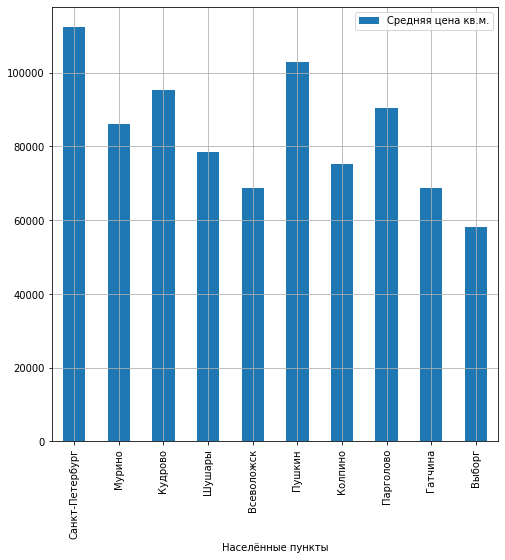

In [70]:
data_pivot.plot(x='Населённые пункты', y='Средняя цена кв.м.', kind='bar', grid=True, figsize=(8, 8));

В сводной таблице мы выделили 10 населённых пунктов, в которых объявления о продаже недвижимости появлялись чаще всего. Из таблицы видно, что средняя стоимость квадратного метра жилья в Санкт-Петербурге самая высокая, а в Выборге — самая низкая.

Рассмотрим стоимость квартир в Санкт-Петербурге в зависимости от их удалённости от центра города. Мы проанализируем цены на квартиры на разном расстоянии от центра и построим график, который покажет, как меняется средняя стоимость объектов недвижимости при удалении от центра на один километр. Это поможет нам понять, как расстояние до центра города влияет на стоимость жилья.

In [71]:
data_spb = (
    data.query('locality_name_split == "Санкт-Петербург"')
    .pivot_table(index=['cityCenters_km'], values='last_price', aggfunc=('count', 'mean'))
)
data_spb['mean'] = round(data_spb['mean']) # округляем
data_spb = data_spb.reset_index(drop=False)
data_spb = (
    data_spb
    .rename(columns={'cityCenters_km': 'Расстояние до центра', 'count': 'Всего объектов', 'mean': 'Средняя цена квартиры'})
)
data_spb

,Расстояние до центра,Всего объектов,Средняя цена квартиры
0,0.0,19.0,21988559.0
1,1.0,162.0,11619012.0
2,2.0,260.0,12002412.0
3,3.0,312.0,9570049.0
4,4.0,619.0,9892485.0
5,5.0,806.0,10453559.0
6,6.0,547.0,10944113.0
7,7.0,383.0,11560972.0
8,8.0,562.0,8214542.0
9,9.0,586.0,6777151.0


-0.7489513369113368

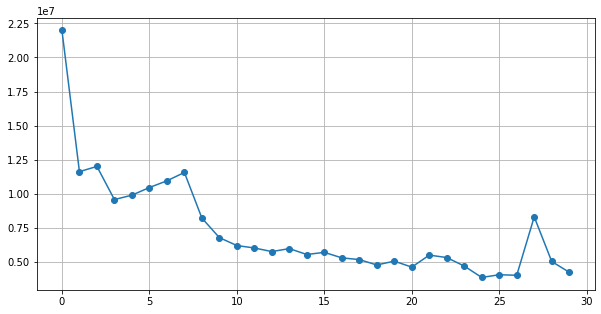

In [72]:
data_spb['Средняя цена квартиры'].plot(style='o-', grid=True, figsize=(10, 5))
data_spb['Средняя цена квартиры'].corr(data_spb['Расстояние до центра'])

Коэффициент корреляции равен -0,75, что указывает на тесную взаимосвязь между расстоянием от центра города и стоимостью объекта недвижимости. То есть, чем дальше объект находится от центра, тем ниже его цена. Однако на графике можно заметить некоторые исключения из этого правила.

После проведения исследовательского анализа данных, можно сказать следующее:
* Большинство объектов недвижимости имеют площадь от 40 до 67 квадратных метров и жилую площадь от 19 до 41 квадратного метра. 

* Чаще всего на продажу выставляли одно-, двух- и трёхкомнатные квартиры, а квартиры на первом и последнем этажах — реже. Это связано с большим количеством вариантов других этажей.

* Недвижимость чаще всего выставляли на продажу со вторника по субботу, особенно в четверг. Реже всего объявления публиковали в понедельник и воскресенье.

* Недвижимость выставленная на продажу обычно находится на расстоянии от 9,66 до 16,37 км от центра города. 

* Парки и скверы обычно расположены в пределах 300–600 м от объекта недвижимости.

* Продажи недвижимости занимают от 44 до 226 дней, в среднем — почти шесть месяцев.

* Объявления о продаже недвижимости размещались на срок от одного дня до 1580 дней. Быстрыми продажами считаются сделки, которые были совершены в течение 1–44 дней, а долгими — те, что длились более 226 дней.

* На стоимость объекта недвижимости влияют площадь квартиры, жилая площадь, площадь кухни и количество комнат. Этаж и месяц публикации объявления о продаже влияют в меньшей степени. Взаимосвязи между днём недели публикации объявления и стоимостью квартиры не обнаружено.

* График цен на квартиры по годам показывает, что после периода снижения цен начался постепенный рост стоимости объектов недвижимости.

* Из 10 населённых пунктов, где чаще всего появлялись объявления о продаже недвижимости, средняя стоимость квадратного метра жилья в Санкт-Петербурге самая высокая, а в Выборге — самая низкая.

* Существует взаимосвязь между расстоянием от центра города и стоимостью объекта недвижимости: чем дальше от центра, тем ниже цена. Но существуют исключения из этого правила.

### Общий вывод

1. При предобработке данных:
* были обнаружены пропуски, и там, где это было возможно, значения были заполнены;
* были рассмотрены типы данных в каждом столбце, и выявлены столбцы, в которых тип данных требовалось изменить;
* были устранены неявные дубликаты;
* были обработаны редкие и необычные значения (аномалии).

2. Были созданы столбцы со следующими данными: цена одного квадратного метра; день недели, месяц и год размещения объявления о продаже недвижимости; тип этажа квартиры; расстояние до центра города в километрах.

3. Был проведён детальный анализ данных, в результате которого были определены факторы, влияющие на стоимость недвижимости:
* Площадь квартиры, жилая площадь и площадь кухни, а также количество комнат. Чем больше эти показатели, тем выше стоимость недвижимости.
* Этаж, на котором находится объект. Квартиры на нижних этажах стоят дешевле, чем на более высоких этажах. Квартиры на последних этажах стоят дороже, чем на первых, но дешевле, чем на остальных этажах.
* Месяц публикации объявления о продаже. В июне недвижимость продавалась по самым низким ценам, а в апреле — по самым высоким.
* Расположение объекта недвижимости в определённом населённом пункте. В Санкт-Петербурге, Пушкине и Кудрово цена квадратного метра выше, чем в других населённых пунктах, где были размещены объявления.
* Расстояние от центра города. Чем дальше от центра, тем ниже цена.




